[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Qiuyi-Hong/SHEMS/blob/main/Simulation%20Results/test.ipynb)

In [1]:
# # Download necessary files:
# import urllib.request, sys

# urls = [
#     'https://raw.githubusercontent.com/Qiuyi-Hong/SHEMS/refs/heads/main/Simulation%20Results/temp_gas.csv'
#     ]
# file_names = [url.split('/')[-1] for url in urls]

# for i in range(len(urls)):
#     urllib.request.urlretrieve(urls[i], file_names[i])

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
temp_gas = pd.read_csv('temp_gas.csv', header=1)
temp_gas.head(10)

,Unnamed: 0,Unnamed: 1,Total nat. gas (kBtu/h),Dry-bulb temperature (�C)
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Date,Time,18 Havelock-test-Newcastle.aps,NewcastleEWY.fwt
4,NaN,NaN,NaN,NaN
5,"Sun, 01/Jan",24:00,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,00:15,7.325,NaN
8,NaN,NaN,NaN,NaN
9,NaN,00:45,7.330,NaN


In [4]:
temp_gas = temp_gas.rename(columns={'Unnamed: 0': 'Date', 'Unnamed: 1': 'Time', 'Dry-bulb temperature (�C)': 'Dry-bulb temperature (°C)'})
df_len = len(temp_gas["Date"])
# Drop the first 5 rows
temp_gas = temp_gas.drop(temp_gas.index[:5])

temp_gas.head(10)

,Date,Time,Total nat. gas (kBtu/h),Dry-bulb temperature (°C)
5,"Sun, 01/Jan",24:00,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,00:15,7.325,NaN
8,NaN,NaN,NaN,NaN
9,NaN,00:45,7.330,NaN
10,NaN,NaN,NaN,NaN
11,NaN,01:00,NaN,5.50
12,NaN,NaN,NaN,NaN
13,NaN,01:15,7.333,NaN
14,NaN,NaN,NaN,NaN


In [5]:
# Custom date parser function
def custom_date_parser(date_str):
    return pd.to_datetime(date_str, format='%a, %d/%b')

# Convert the Date column using the custom parser
temp_gas["Date"] = temp_gas["Date"].apply(custom_date_parser)
temp_gas["Date"] = temp_gas["Date"].dt.strftime('%m-%d')

print(temp_gas)

        Date   Time Total nat. gas (kBtu/h) Dry-bulb temperature (°C)
5      01-01  24:00                     NaN                       NaN
6        NaN    NaN                     NaN                       NaN
7        NaN  00:15                   7.325                       NaN
8        NaN    NaN                     NaN                       NaN
9        NaN  00:45                   7.330                       NaN
...      ...    ...                     ...                       ...
52560    NaN    NaN                     NaN                       NaN
52561    NaN  23:15                   7.262                       NaN
52562    NaN    NaN                     NaN                       NaN
52563    NaN  23:45                   7.223                       NaN
52564    NaN    NaN                     NaN                       NaN

[52560 rows x 4 columns]


In [6]:
for i in range(0, len(temp_gas["Date"]), 144):
    # Get the date from row 0
    date_to_duplicate = temp_gas.iloc[i]['Date']

    # Assign this date to rows 0 to 143
    # temp_gas.iloc[0:144, 0] = date_to_duplicate
    temp_gas.iloc[i:144 + i, temp_gas.columns.get_loc('Date')] = date_to_duplicate


In [ ]:
for i in range(6, len(temp_gas["Date"]), 6):
    temp_to_duplicate = temp_gas.iloc[i]['Dry-bulb temperature (°C)']
    
    temp_gas.iloc[i - 4, temp_gas.columns.get_loc('Dry-bulb temperature (°C)')] = temp_to_duplicate
    temp_gas.iloc[i - 2, temp_gas.columns.get_loc('Dry-bulb temperature (°C)')] = temp_to_duplicate

In [ ]:
for i in range(6, df_len, 2):
    temp_gas.drop(i, inplace=True)

In [ ]:
for i in range(5, df_len, 6):
    temp_gas.drop(i, inplace=True)

In [ ]:
temp_gas.iloc[-1, temp_gas.columns.get_loc('Dry-bulb temperature (°C)')] = temp_gas.iloc[-3]['Dry-bulb temperature (°C)']
temp_gas.iloc[-2, temp_gas.columns.get_loc('Dry-bulb temperature (°C)')] = temp_gas.iloc[-3]['Dry-bulb temperature (°C)']

In [ ]:
# Export the DataFrame to a CSV file
temp_gas.to_csv('temp_gas_updated.csv', index=False)

In [ ]:
tg = pd.read_csv('temp_gas_updated.csv')

In [ ]:
# Convert Date and Time columns to datetime objects
tg['Date'] = pd.to_datetime(tg['Date'], format='%m-%d')
tg['Time'] = pd.to_datetime(tg['Time'], format='%H:%M').dt.time

# Combine Date and Time columns into a single datetime column
tg['DateTime'] = tg.apply(lambda row: datetime.combine(row['Date'], row['Time']), axis=1)

# Format the combined datetime column to the desired format
tg['DateTime'] = tg['DateTime'].dt.strftime('%m-%d %H:%M')


In [ ]:
# Drop the Date and Time columns
tg.drop(columns=['Date', 'Time'], inplace=True)
# Rearrange 'DateTime' column to be the first column
column_to_move = tg.pop('DateTime')
tg.insert(0, 'DateTime', column_to_move)

In [ ]:
# Export the DataFrame to a excel file
# tg.to_csv('temp_gas_completed.csv', index=False)

Text(0, 0.5, 'Total nat. gas (kBtu/h)')

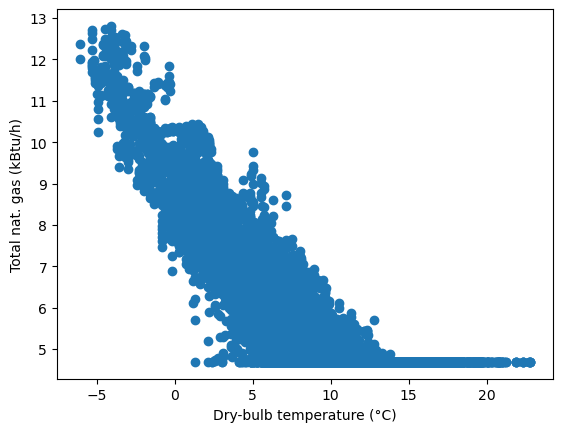

In [8]:
df = pd.read_csv('temp_gas_completed.csv')

plt.scatter(df['Dry-bulb temperature (°C)'], df['Total nat. gas (kBtu/h)'])
plt.xlabel('Dry-bulb temperature (°C)')
plt.ylabel('Total nat. gas (kBtu/h)')